#### Kaggle Link: https://www.kaggle.com/competitions/pubg-lets-play/overview

In [85]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None) # shows all columns in output dataframe 

In [86]:
data = pd.read_csv("../train_preprocessed.csv")
test_data = pd.read_csv("../test_up.csv")

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
def setSnsSize(x, y):
    sns.set(rc = {'figure.figsize':(x,y)})
def setPlotSize(x, y):
    plt.figure(figsize=(x,y))

In [88]:
standard_mode = ['solo-fpp', 'duo', 'squad', 'squad-fpp', 'duo-fpp', 'solo']
arcade_mode = ['normal-duo-fpp', 'normal-squad-fpp','normal-solo-fpp','normal-duo', 'normal-squad','normal-solo']
other = ['crashfpp', 'flarefpp','flaretpp','crashtpp']

In [89]:
train_data = data.copy()

In [90]:
train_data.matchType = train_data.matchType.replace(standard_mode,'standard-mode')
train_data.matchType = train_data.matchType.replace(arcade_mode,'arcade-mode')
train_data.matchType = train_data.matchType.replace(other,'other')

In [91]:
train_data.matchType.unique()

array(['standard-mode', 'arcade-mode', 'other'], dtype=object)

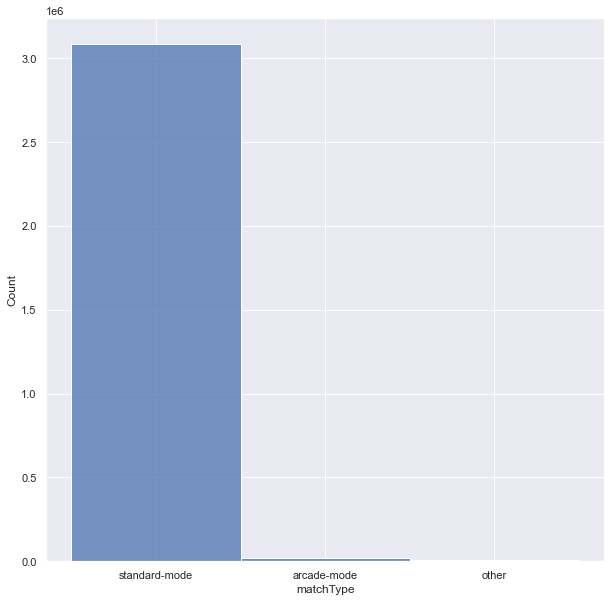

In [94]:
sns.histplot(data=train_data.matchType)
setSnsFigSize(10, 10)

In [95]:
print(f"standard mode matches: {train_data[train_data.matchType == 'standard-mode'].shape[0]}")
print(f"arcade mode matches: {train_data[train_data.matchType == 'arcade-mode'].shape[0]}")
print(f"other matches: {train_data[train_data.matchType == 'other'].shape[0]}")

standard mode matches: 3087707
arcade mode matches: 17757
other matches: 6873


## Matchtype & kills

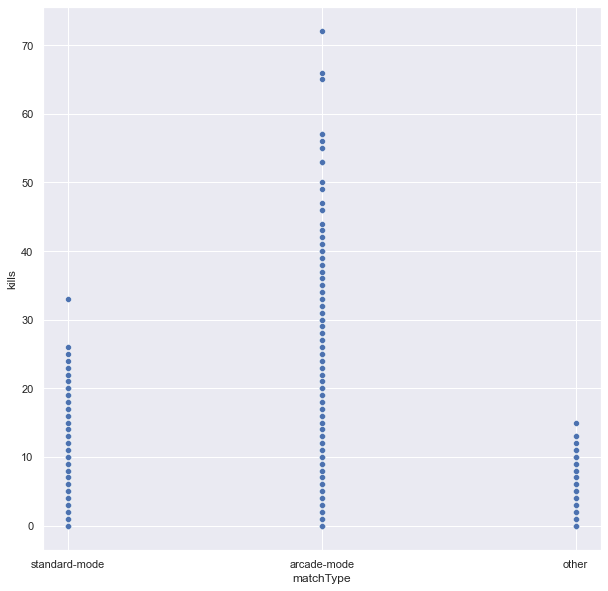

In [96]:
sns.scatterplot(x=train_data.matchType, y=train_data.kills)
setSnsFigSize(10, 10)

#### Standard Game Modes has kills from 0 to <= 33
#### Arcade Game Modes has kills from 0 to <= 72
#### Other Game Modes has kills from 0 to <= 20

In [97]:
print(f"Max kills in standard modes:{train_data[train_data.matchType == 'standard-mode'].kills.max()}")
print(f"Max kills in arcade modes:{train_data[train_data.matchType == 'arcade-mode'].kills.max()}")
print(f"Max kills in other modes:{train_data[train_data.matchType == 'other'].kills.max()}")

Max kills in standard modes:33
Max kills in arcade modes:72
Max kills in other modes:15


## Matchtype & Revieves

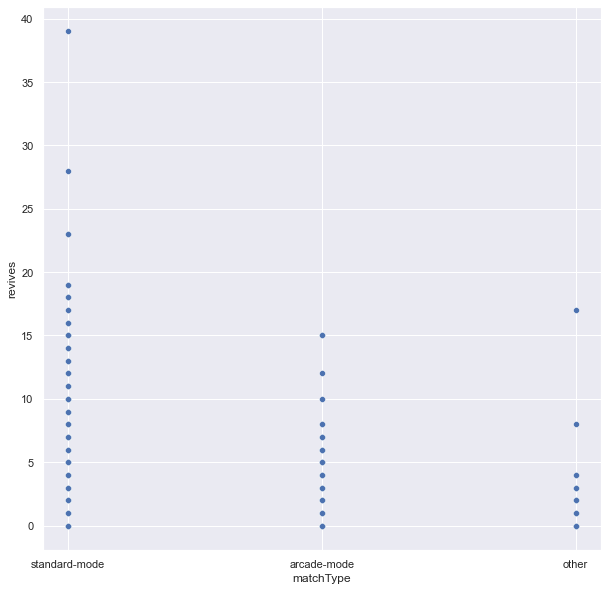

In [98]:
sns.scatterplot(x=train_data.matchType, y=train_data.revives)
setSnsFigSize(8, 8)

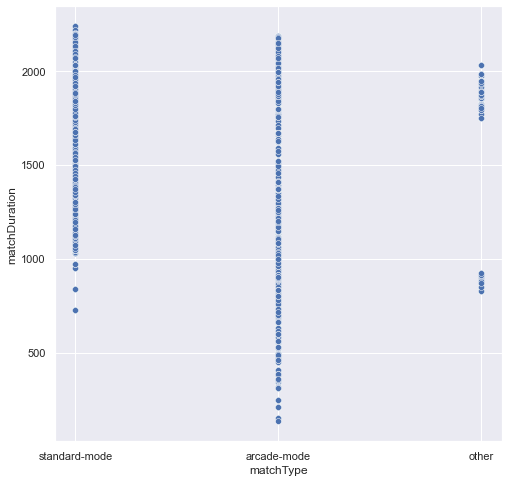

In [99]:
sns.scatterplot(x=train_data.matchType, y=train_data.matchDuration)
setSnsFigSize(8, 8)

## creating different data_sets for standard, arcade, other mode

In [100]:
standard_data = train_data[train_data.matchType == 'standard-mode']
arcade_data = train_data[train_data.matchType == 'arcade-mode']
other_data = train_data[train_data.matchType == 'other']

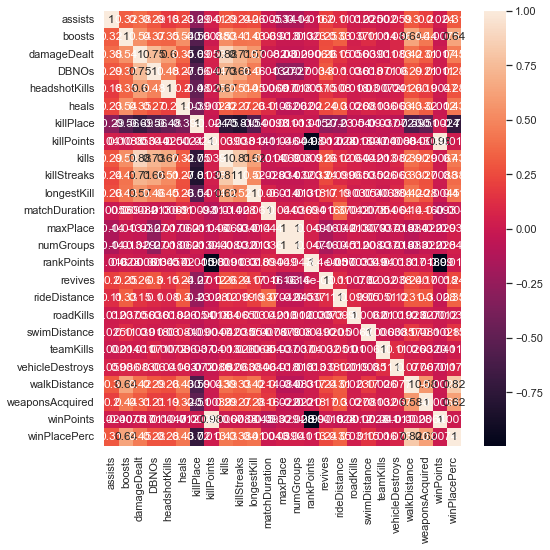

In [101]:
sns.heatmap(standard_data.corr(), annot=True)
setSnsSize(20, 20)

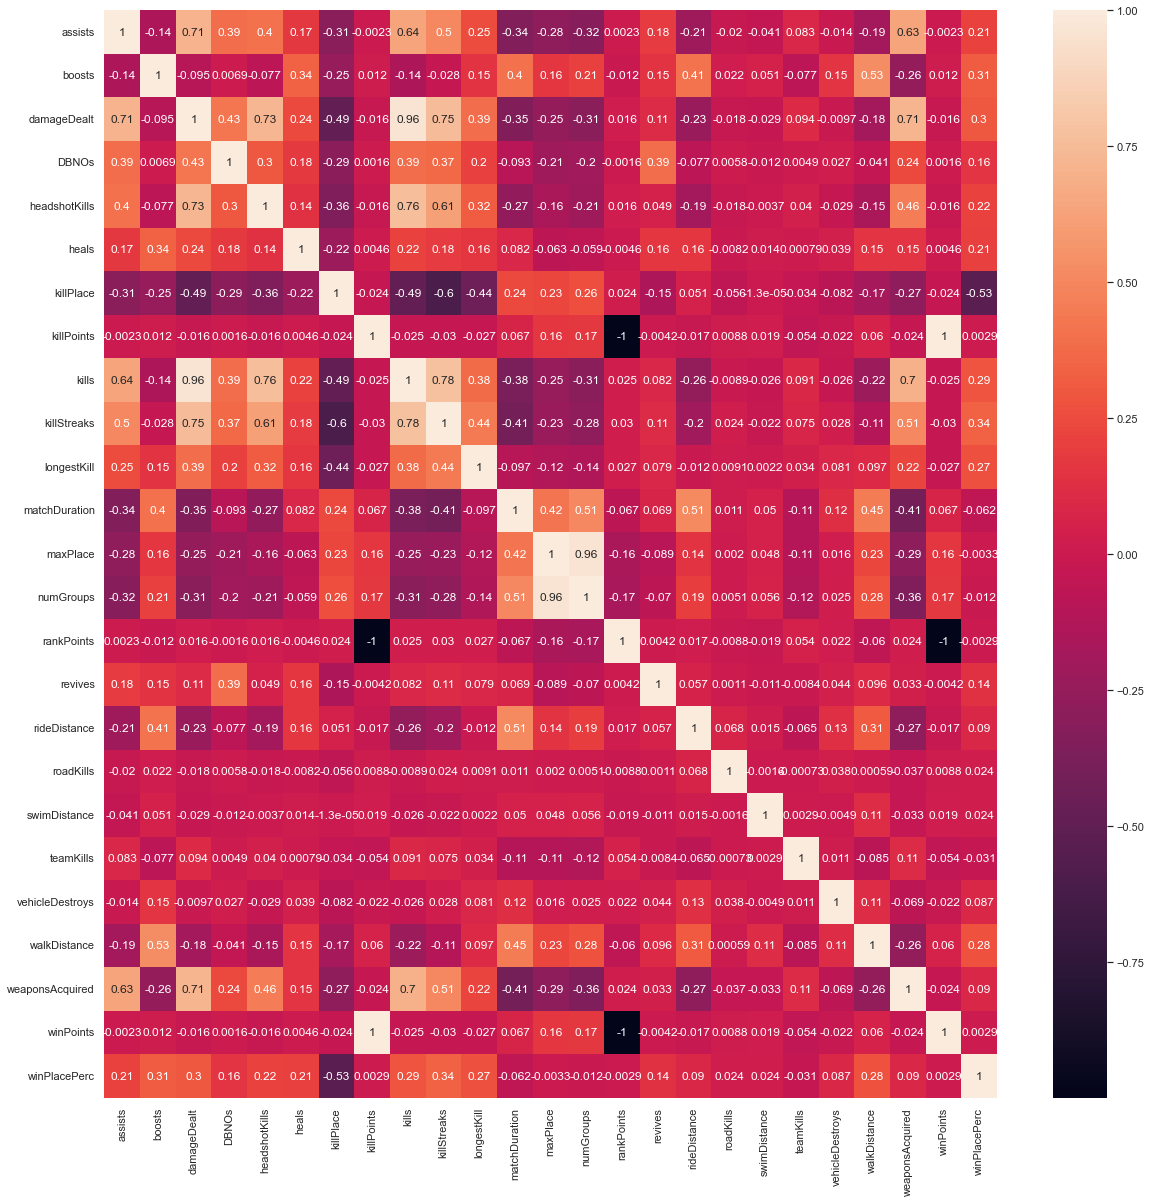

In [102]:
sns.heatmap(arcade_data.corr(), annot=True)
setSnsSize(20, 20)

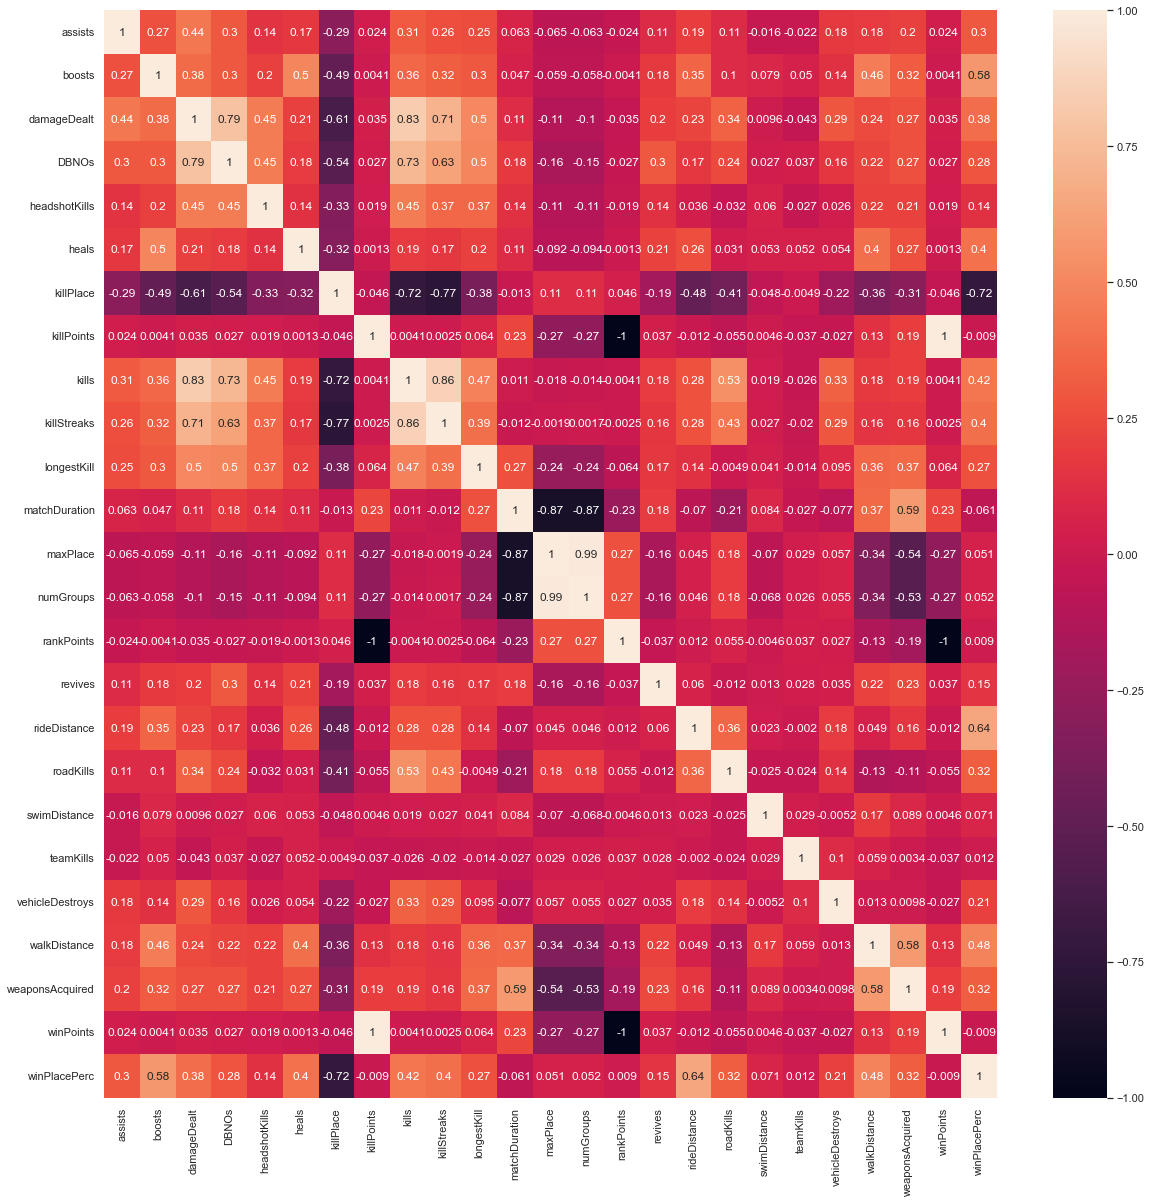

In [103]:
sns.heatmap(other_data.corr(), annot=True)
setSnsSize(20, 20)

In [104]:
# data = pd.read_csv("../test_up.csv")

In [105]:
test_data.isna().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
dtype: int64

In [106]:
test_data.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
dtype: int64

In [107]:
test_data.matchType = test_data.matchType.replace(standard_mode,'standard-mode')
test_data.matchType = test_data.matchType.replace(arcade_mode,'arcade-mode')
test_data.matchType = test_data.matchType.replace(other,'other')

In [108]:
standard_test_data = test_data[test_data.matchType == 'standard-mode']
arcade_test_data = test_data[test_data.matchType == 'arcade-mode']
other_test_data = test_data[test_data.matchType == 'other']

In [109]:
standard_test_data=standard_test_data.sample(frac=1, random_state=12)
arcade_test_data=arcade_test_data.sample(frac=1, random_state=12)
other_test_data=other_test_data.sample(frac=1, random_state=12)

In [110]:
standard_test_Id = standard_test_data.Id
arcade_test_Id = arcade_test_data.Id
other_test_Id = other_test_data.Id

In [111]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [114]:
drop_col_standard = ['Id', 'groupId', 'matchId', 'winPlacePerc', 'matchType']
drop_col_arcade = ['Id', 'groupId', 'matchId', 'winPlacePerc', 'matchType']
drop_col_other = ['Id', 'groupId', 'matchId', 'winPlacePerc', 'matchType']

In [115]:
y_standard_train = standard_data.winPlacePerc
y_arcade_train = arcade_data.winPlacePerc
y_other_train = other_data.winPlacePerc

In [116]:
standard_data_train = standard_data.drop(drop_col_standard,axis=1)
arcade_data_train = arcade_data.drop(drop_col_arcade,axis=1)
other_data_train = other_data.drop(drop_col_other,axis=1)


standard_test_data = standard_test_data.drop(['Id', 'groupId', 'matchId', 'matchType'],axis=1)
arcade_test_data = arcade_test_data.drop(['Id', 'groupId', 'matchId', 'matchType'],axis=1)
other_test_data = other_test_data.drop(['Id', 'groupId', 'matchId', 'matchType'],axis=1)

In [77]:
scalar = StandardScaler()
# scalar = MinMaxScaler()

In [124]:
standardScalar = scalar.fit(standard_data_train)
standardScalar.transform(standard_data_train)
standardScalar.transform(standard_test_data)

array([[-0.40122155, -0.64477731, -0.78134945, ..., -0.0844705 ,
        -0.91267548, -1.56175105],
       [-0.40122155, -0.64477731, -0.18386503, ..., -0.0844705 ,
        -0.82075472, -0.27173028],
       [-0.40122155, -0.64477731, -0.17734175, ..., -0.0844705 ,
        -0.94000761,  0.15827664],
       ...,
       [-0.40122155,  2.85350068,  1.26080058, ..., -0.0844705 ,
         3.22948529,  2.30831125],
       [-0.40122155, -0.64477731,  0.27868406, ..., -0.0844705 ,
        -0.74473829, -0.27173028],
       [-0.40122155,  1.10436169, -0.04748009, ..., -0.0844705 ,
         0.408431  ,  1.87830433]])

In [125]:
arcadeScalar = scalar.fit(arcade_data_train)
arcadeScalar.transform(arcade_data_train)
arcadeScalar.transform(arcade_test_data)

array([[ 0.48381095, -0.74469237,  0.93463907, ..., -0.15115948,
         1.13837846,  1.27517234],
       [-0.62199817, -0.22177627, -0.73986075, ..., -0.15115948,
         0.77546855, -0.46643915],
       [ 0.48381095, -0.74469237,  0.78893616, ..., -0.15115948,
        -0.07395101,  2.03712736],
       ...,
       [-0.06909361,  0.82405594, -0.56762947, ..., -0.15115948,
         1.85806212, -0.35758843],
       [-0.62199817, -0.22177627, -0.71536409, ..., -0.15115948,
        -0.3900508 , -0.57528987],
       [-0.62199817,  1.86988816, -0.37881553, ..., -0.15115948,
         0.45814153, -0.46643915]])

In [126]:
otherScalar = scalar.fit(other_data_train)
otherScalar.transform(other_data_train)
otherScalar.transform(other_test_data)

array([[-0.39135831, -0.12104683, -0.70461518, ..., -0.20646537,
         0.46843397,  0.68284707],
       [-0.39135831, -0.72875672, -0.70461518, ..., -0.20646537,
        -0.84818359, -1.0926974 ],
       [-0.39135831, -0.72875672, -0.70461518, ..., -0.20646537,
        -0.94067042, -1.0926974 ],
       ...,
       [-0.39135831,  1.70208285,  0.06655543, ..., -0.20646537,
         1.98896441,  1.12673319],
       [-0.39135831, -0.72875672,  0.66879642, ..., -0.20646537,
        -0.86336815, -0.64881128],
       [-0.39135831, -0.12104683,  0.12835895, ...,  3.2294583 ,
        -0.81063706,  0.23896095]])

# Standard Mode Model

In [127]:
# X_train, X_test, y_train, y_test = train_test_split(standard_data_train, y_standard_train, test_size= 0.2 , random_state=19)

## Linear Regression

In [128]:
# standard_model = LinearRegression()
# standard_model.fit(X_train, y_train)
# y_pred = standard_model.predict(X_test)

In [129]:
# print(f"Min value: {y_pred.min()}, Max value: {y_pred.max()}")

winPlaceperc is percentage scaled on [0, 1], and since the model is regression it can give prediction value outside bound of [0, 1], so we are handling 0 for <0 values and 1 for >1 values

In [130]:
# y_pred[y_pred > 1] = 1
# y_pred[y_pred < 0] = 0

In [131]:
# print(f"Min value: {y_pred.min()}, Max value: {y_pred.max()}")

In [132]:
# mse = mean_squared_error(y_test, y_pred)
# # mse

## Ridge Regression

In [133]:
# standard_ridge_model = Ridge(alpha=0.22)
# standard_ridge_model.fit(standard_data_train, y_standard_train)
# y_standard_pred = standard_ridge_model.predict(standard_test_data)

In [134]:
# y_standard_pred[y_standard_pred > 1] = 1
# y_standard_pred[y_standard_pred < 0] = 0

In [135]:
# print(f"Min value: {y_pred.min()}, Max value: {y_pred.max()}")

In [136]:
# mse = mean_squared_error(y_test, y_pred)
# mse

## Random Forest Regression

In [137]:
# standard_forest = RandomForestRegressor(n_estimators= 125, random_state=32)
# standard_forest.fit(X_train, y_train)
# y_pred = standard_forest.predict(X_test)

In [138]:
# y_pred[y_pred > 1] = 1
# y_pred[y_pred < 0] = 0

In [139]:
# mse = mean_squared_error(y_test, y_pred)
# mse

# Arcade Mode Model

In [140]:
# X_train, X_test, y_train, y_test = train_test_split(arcade_data_train, y_arcade_train, test_size= 0.2, random_state=19)

## Linear Regression

In [141]:
# arcade_model = LinearRegression()
# arcade_model.fit(X_train, y_train)
# y_pred = arcade_model.predict(X_test)

In [142]:
# y_pred[y_pred > 1] = 1
# y_pred[y_pred < 0] = 0

In [143]:
# mse = mean_squared_error(y_test, y_pred)
# mse

## Ridge Regression

In [144]:
# arcade_ridge_model = Ridge(alpha=0.04)
# arcade_ridge_model.fit(X_train, y_train)
# y_pred = arcade_ridge_model.predict(X_test)

In [145]:
# y_pred[y_pred > 1] = 1
# y_pred[y_pred < 0] = 0

In [146]:
# mse = mean_squared_error(y_test, y_pred)
# mse

## Random Forest Regression

In [147]:
# arcade_forest = RandomForestRegressor(n_estimators= 123, random_state=32)
# arcade_forest.fit(X_train, y_train)
# y_pred = arcade_forest.predict(X_test)

In [148]:
# y_pred[y_pred > 1] = 1
# y_pred[y_pred < 0] = 0

In [149]:
# mse = mean_squared_error(y_test, y_pred)
# mse

# Other Mode Model

In [150]:
# X_train, X_test, y_train, y_test = train_test_split(other_data_train, y_other_train, test_size= 0.2, random_state=12)

## Linear Regression

In [151]:
# other_model = LinearRegression()
# other_model.fit(X_train, y_train)
# y_pred = other_model.predict(X_test)

In [152]:
# y_pred[y_pred > 1] = 1
# y_pred[y_pred < 0] = 0

In [153]:
# mse = mean_squared_error(y_test, y_pred)
# mse

## Ridge Regression

In [154]:
# other_ridge_model = Ridge(alpha=0.002)
# other_ridge_model.fit(X_train, y_train)
# y_pred = other_ridge_model.predict(X_test)

In [155]:
# y_pred[y_pred > 1] = 1
# y_pred[y_pred < 0] = 0

In [156]:
# mse = mean_squared_error(y_test, y_pred)
# mse

## Random Forest Regression

In [157]:
# other_forest = RandomForestRegressor(n_estimators= 125, random_state=32)
# other_forest.fit(X_train, y_train)
# y_pred = other_forest.predict(X_test)

In [158]:
# y_pred[y_pred > 1] = 1
# y_pred[y_pred < 0] = 0

In [159]:
# mse = mean_squared_error(y_test, y_pred)
# mse

# TEST SUBMISSION

In [161]:
# standard_ridge_model = Ridge(alpha=0.002, random_state=42)
# standard_ridge_model.fit(standard_data_train, y_standard_train)
# y_standard_pred = standard_ridge_model.predict(standard_test_data)
# y_standard_pred[y_standard_pred > 1] = 1
# y_standard_pred[y_standard_pred < 0] = 0

In [162]:
standard_forest = RandomForestRegressor(n_estimators= 150, random_state=42)
standard_forest.fit(standard_data_train, y_standard_train)
y_standard_pred = standard_forest.predict(standard_test_data)

In [163]:
# arcade_ridge_model = Ridge(alpha=0.002, random_state=42)
# arcade_ridge_model.fit(arcade_data_train, y_arcade_train)
# y_arcade_pred = arcade_ridge_model.predict(arcade_test_data)
# y_arcade_pred[y_arcade_pred > 1] = 1
# y_arcade_pred[y_arcade_pred < 0] = 0

In [164]:
arcade_forest = RandomForestRegressor(n_estimators= 150, random_state=42)
arcade_forest.fit(arcade_data_train, y_arcade_train)
y_arcade_pred = arcade_forest.predict(arcade_test_data)

In [165]:
# other_ridge_model = Ridge(alpha=0.002, random_state=42)
# other_ridge_model.fit(other_data_train, y_other_train)
# y_other_pred = other_ridge_model.predict(other_test_data)
# y_other_pred[y_other_pred > 1] = 1
# y_other_pred[y_other_pred < 0] = 0

In [166]:
other_forest = RandomForestRegressor(n_estimators= 125, random_state=42)
other_forest.fit(other_data_train, y_other_train)
y_other_pred = other_forest.predict(other_test_data)

In [167]:
matchId = np.append(np.append(standard_test_Id, arcade_test_Id), other_test_Id)

In [168]:
prediction = np.append(np.append(y_standard_pred, y_arcade_pred), y_other_pred)

In [169]:
submission = pd.DataFrame({'Id': matchId, 'winPlacePerc': prediction})

In [170]:
submission = submission.round({'winPlacePerc': 4})

In [185]:
submission.to_csv('hypo_3_rf_submission_feature_selection.csv', index=False)